In [72]:
import pandas as pd
import numpy as np
from Preprocessing import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [8]:
Withcategorie = pd.read_csv('data/rdyforml/Withcategorie.csv')
Withdeuxcentdummies = pd.read_csv('data/rdyforml/Withdeuxcentdummies.csv')
SalarycategWithcategorie = pd.read_csv('data/rdyforml/SalarycategWithcategorie.csv')
SalarycategWithdeuxcentdummies = pd.read_csv('data/rdyforml/SalarycategWithdeuxcentdummies.csv')

In [9]:
Withcategorie = Withcategorie.drop(['TypeContrat','Description','Link'],axis=1)
Withdeuxcentdummies = Withdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithcategorie = SalarycategWithcategorie.drop(['TypeContrat','Description','Link'],axis=1)
SalarycategWithdeuxcentdummies = SalarycategWithdeuxcentdummies.drop(['TypeContrat','Description','Link'],axis=1)

In [10]:
Withcategorie_traintest = Withcategorie[Withcategorie['Salary'] != 'notfound']
Withcategorie_apredict = Withcategorie[Withcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Withdeuxcentdummies_traintest = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] != 'notfound']
Withdeuxcentdummies_apredict = Withdeuxcentdummies[Withdeuxcentdummies['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithcategorie_traintest = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] != 'notfound']
SalarycategWithcategorie_apredict = SalarycategWithcategorie[SalarycategWithcategorie['Salary'] == 'notfound']
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SalarycategWithdeuxcentdummies_traintest = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] != 'notfound']
SalarycategWithdeuxcentdummies_apredict = SalarycategWithdeuxcentdummies[SalarycategWithdeuxcentdummies['Salary'] == 'notfound']

In [11]:
y1=Withcategorie_traintest.pop('Salary')
Withcategorie_traintest =pd.get_dummies(Withcategorie_traintest)
X1=Withcategorie_traintest
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X1,y1,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y2=Withdeuxcentdummies_traintest.pop('Salary')
Withdeuxcentdummies_traintest =pd.get_dummies(Withdeuxcentdummies_traintest)
X2=Withdeuxcentdummies_traintest
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y3=SalarycategWithcategorie_traintest.pop('Salary')
SalarycategWithcategorie_traintest =pd.get_dummies(SalarycategWithcategorie_traintest)
X3=SalarycategWithcategorie_traintest
Xtrain3,Xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size= 0.3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y4=SalarycategWithdeuxcentdummies_traintest.pop('Salary')
SalarycategWithdeuxcentdummies_traintest =pd.get_dummies(SalarycategWithdeuxcentdummies_traintest)
X4=SalarycategWithdeuxcentdummies_traintest
Xtrain4,Xtest4,ytrain4,ytest4 = train_test_split(X4,y4,test_size= 0.3)

In [12]:
parametre = {
    'n_estimators': np.arange(10,90,10),
    'criterion': ('mae','mse'),
    'max_depth': np.arange(2,6),
    'min_samples_split': np.arange(2,5),
    'max_features':('auto','sqrt','log2', None),
    'bootstrap':(True,False)
}
clf = RandomForestRegressor(max_depth=2, random_state=0)
Forest1 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Forest1.fit(Xtrain1, ytrain1)
ypred1 = Forest1.predict(Xtest1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Forest2 = GridSearchCV(clf, parametre,verbose=1,n_jobs=4)
Forest2.fit(Xtrain2, ytrain2)
ypred2 = Forest2.predict(Xtest2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
params = {'n_estimators':[50],
          'criterion':['gini','entropy'],
          'max_depth': np.arange(2,5),
          'max_features':['auto','sqrt','log2',None],
          'bootstrap':[True,False]
         }
thetree = RandomForestClassifier(random_state=7)
Forest3 = GridSearchCV(thetree, params,verbose=1,n_jobs=4)
Forest3.fit(Xtrain3, ytrain3)
ypred3 = Forest3.predict(Xtest3)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Forest4 = GridSearchCV(thetree, params,verbose=1,n_jobs=4)
Forest4.fit(Xtrain4, ytrain4)
ypred4 = Forest4.predict(Xtest4)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 296 tasks      | elapsed:   21.4s
[Parallel(n_jobs=4)]: Done 618 tasks      | elapsed:   55.9s
[Parallel(n_jobs=4)]: Done 1072 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 2598 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 3260 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 4608 out of 4608 | elapsed:  6.9min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 296 tasks      | elapsed:   43.7s
[Parallel(n_jobs=4)]: Done 626 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1064 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 2398 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done 3048 tasks      | elapsed:  9.3min
[Parallel(n_jobs=4)]: Done 4332 tasks      | elapsed: 13.4min
[Parallel(n_jobs=4)]: Done 4608 out of 4608 | elapsed: 13.5min finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitl

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 137 out of 144 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    2.4s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be les

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done 125 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 137 out of 144 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    2.9s finished
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


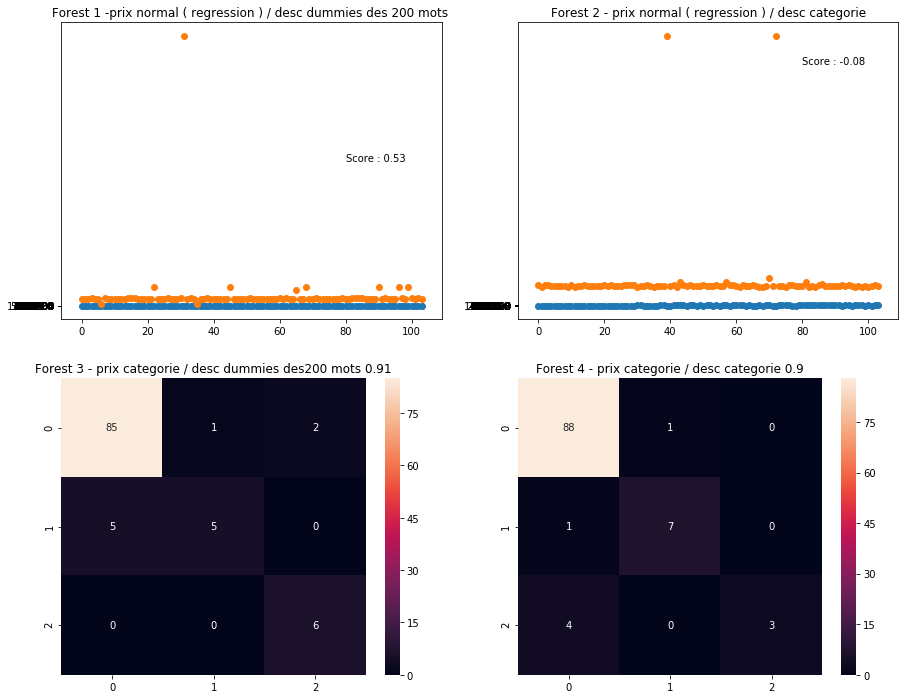

In [60]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.scatter(range(len(ytest1)),ytest1)
plt.scatter(range(len(ypred1)),ypred1)
plt.text(80,900000,"Score : "+str(round(Forest1.best_estimator_.score(Xtest1,ytest1),2)))
plt.title("Forest 1 -prix normal ( regression ) / desc dummies des 200 mots ")
plt.subplot(2,2,2)
plt.scatter(range(len(ytest2)),ytest2)
plt.scatter(range(len(ypred2)),ypred2)
plt.text(80,500000,"Score : "+str(round(Forest2.best_estimator_.score(Xtest2,ytest2),2)))
plt.title("Forest 2 - prix normal ( regression ) / desc categorie")
plt.subplot(2,2,3)
conf3 = confusion_matrix(ytest3,ypred3)
sns.heatmap(conf3,annot=True)
plt.title("Forest 3 - prix categorie / desc dummies des200 mots "+ str(round(Forest3.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.subplot(2,2,4)
conf4 = confusion_matrix(ytest4,ypred4)
sns.heatmap(conf4,annot=True)
plt.plot(label="Score : "+str(Forest4.best_score_))
plt.title("Forest 4 - prix categorie / desc categorie "+ str(round(Forest4.best_score_,2)))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [75]:
print(classification_report(ytest3,ypred3))
print(classification_report(ytest4,ypred4))

               precision    recall  f1-score   support

    25a60Kans       0.94      0.97      0.96        88
   60a200Kans       0.83      0.50      0.62        10
moinsde25Kans       0.75      1.00      0.86         6

     accuracy                           0.92       104
    macro avg       0.84      0.82      0.81       104
 weighted avg       0.92      0.92      0.92       104

               precision    recall  f1-score   support

    25a60Kans       0.95      0.99      0.97        89
   60a200Kans       0.88      0.88      0.88         8
moinsde25Kans       1.00      0.43      0.60         7

     accuracy                           0.94       104
    macro avg       0.94      0.76      0.81       104
 weighted avg       0.94      0.94      0.94       104

